In [ ]:
import sys

from tests.smoke_tests.olesik_et_al_2022.test_simulation import settings

if 'google.colab' in sys.modules:
    !pip --quiet install open-atmos-jupyter-utils
    from open_atmos_jupyter_utils import pip_install_on_colab
    pip_install_on_colab('PyMPDATA-examples')

In [1]:
import os
os.environ["NUMBA_DISABLE_JIT"] = "1"

from asian_option import AsianArithmetic, Settings, plot_solution, plot_difference_arithmetic

import numpy as np
from matplotlib import pyplot
from ipywidgets import IntProgress
from tqdm import tqdm

from open_atmos_jupyter_utils import show_plot, show_anim
from monte_carlo import BSModel, FixedStrikeGeometricAsianOption, FixedStrikeArithmeticAsianOption

In [5]:
params_list=[
    {
        'T': 1,
        'K': 100,
        'r': 0.1,
        'sgma': 0.1,
        'spot': 100,
        'true_price': 5.279,
    },
    {
        'T': 1,
        'K': 100,
        'r': 0.2,
        'sgma': 0.1,
        'spot': 100,
        'true_price': 1.869,
    },
    {
        'T': 1,
        'K': 100,
        'r': 0.3,
        'sgma': 0.1,
        'spot': 100,
        'true_price': 0.151,
    },
]

In [18]:
def run_numeric_and_mc(params, nx=31, ny=41, nt=300):
    settings = Settings(T=params['T'], K=params['K'], r=params['r'], sgma=params['sgma'], S_max=params['spot']*2, S_min=params['spot']/2)
    simulation = AsianArithmetic(settings, nx=nx, ny=ny, nt=nt)
    
    
    history = []
    progbar = IntProgress(max = simulation.nt)
    display(progbar)
    for progbar.value in range(simulation.nt + 1):
        if progbar.value != 0:
            res = simulation.step()
        history.append(simulation.solver.advectee.get().copy())
    
    arithmetic_by_mc = np.zeros_like(simulation.S)
    arithmetic_option = FixedStrikeArithmeticAsianOption(settings.params.T, settings.params.K, 'call')
    for idx, spot in tqdm(enumerate(simulation.S)):
        model = BSModel(spot, settings.params.r, settings.params.sgma, settings.params.T, 1000)
        arithmetic_by_mc[idx] = arithmetic_option.price_by_mc(model, 100000)
    _, ax = pyplot.subplots(1, 1, figsize=(10, 5))
    plot_solution(settings=settings,
                  frame_index=-1,
                  ax=ax,
                  history=history,
                  arithmetic_by_mc=arithmetic_by_mc,
                  S_linspace=simulation.S,
                  option_type='arithmetic call')
    show_plot('numeric_vs_analytic.pdf')
    _, ax = pyplot.subplots(1, 1, figsize=(10, 5))
    plot_difference_arithmetic(settings=settings,
                  frame_index=-1,
                  ax=ax,
                  history=history,
                  arithmetic_by_mc=arithmetic_by_mc,
                  S_linspace=simulation.S,
                  option_type='arithmetic call')
    show_plot('numeric_vs_analytic_error.pdf')
    
    print(f"True price: {params['true_price']}")
    print(f"Numeric price: {np.interp(params['spot'], simulation.S, history[-1][:,0])}")
    print(f"MC price: {np.interp(params['spot'], simulation.S, arithmetic_by_mc)}")

self.l2=np.float64(15.494319180377357)
dx: 0.022726137067539186, dy: 1.550387596899225, dt: 0.0033333333333333335, l2: 15.494319180377357
CFL 0.4439340296032524
courant_x=np.float64(0.013934029603252575), courant_y=np.float64(0.4299999999999998)
x_dim_advector.shape=(62, 130), self.a_dim_advector.shape=(61, 131)


IntProgress(value=0, max=300)

61it [02:00,  1.97s/it]


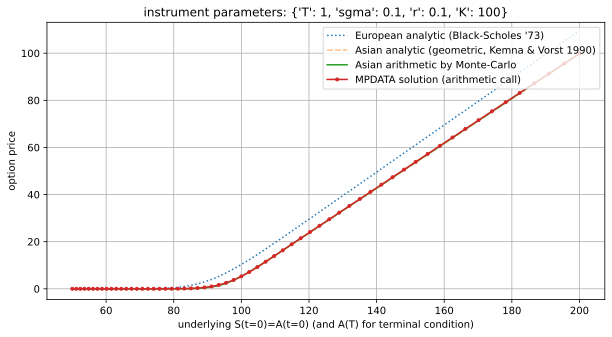

/home/pawel/PycharmProjects/PyMPDATA/examples/PyMPDATA_examples/Magnuszewski_et_al_2025/asian_option.py:348: RuntimeWarning: divide by zero encountered in divide
  abs(arithmetic_by_mc - history[frame_index][:, 0]) / arithmetic_by_mc,
/home/pawel/PycharmProjects/PyMPDATA/examples/PyMPDATA_examples/Magnuszewski_et_al_2025/asian_option.py:357: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(0, 100)


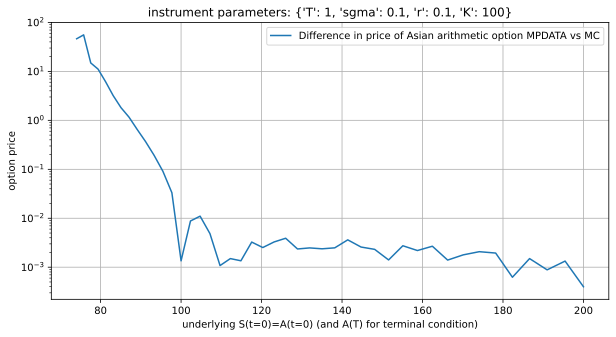

True price: 5.279
Numeric price: 5.277935216329922
MC price: 5.270802756781665


In [19]:
params = {
        'T': 1,
        'K': 100,
        'r': 0.1,
        'sgma': 0.1,
        'spot': 100,
        'true_price': 5.279,
    }
run_numeric_and_mc(params, nx=61, ny=130, nt=300)

self.l2=np.float64(11.437088210709012)
dx: 0.01952527269182944, dy: 1.550387596899225, dt: 0.0033333333333333335, l2: 11.437088210709012
CFL 0.44621829675132657
courant_x=np.float64(0.016218296751326768), courant_y=np.float64(0.4299999999999998)
x_dim_advector.shape=(72, 130), self.a_dim_advector.shape=(71, 131)


IntProgress(value=0, max=300)

71it [02:17,  1.94s/it]


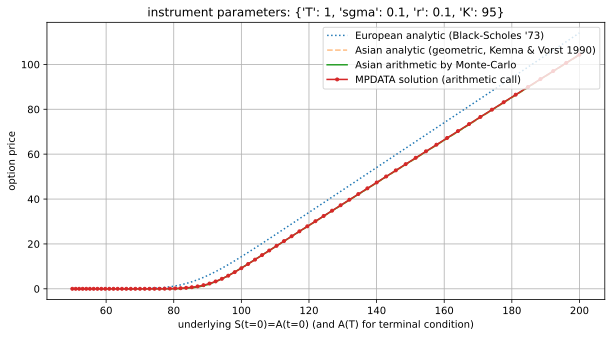

/home/pawel/PycharmProjects/PyMPDATA/examples/PyMPDATA_examples/Magnuszewski_et_al_2025/asian_option.py:348: RuntimeWarning: divide by zero encountered in divide
  abs(arithmetic_by_mc - history[frame_index][:, 0]) / arithmetic_by_mc,
/home/pawel/PycharmProjects/PyMPDATA/examples/PyMPDATA_examples/Magnuszewski_et_al_2025/asian_option.py:357: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(0, 100)


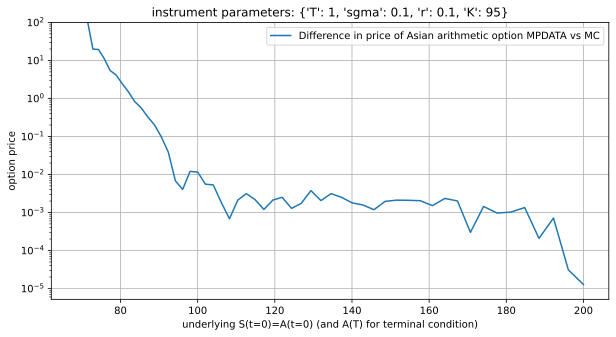

True price: 9.313
Numeric price: 9.176850144009219
MC price: 9.284146110918186


In [51]:
params = {
        'T': 1,
        'K': 95,
        'r': 0.1,
        'sgma': 0.1,
        'spot': 100,
        'true_price': 9.313,
    }
run_numeric_and_mc(params, nx=71, ny=130, nt=300)

self.l2=np.float64(9.41972382939322)
dx: 0.013725686743761291, dy: 1.0050251256281406, dt: 0.002, l2: 9.41972382939322
CFL 0.41184265891732946
courant_x=np.float64(0.013842658917329607), courant_y=np.float64(0.39799999999999985)
x_dim_advector.shape=(102, 200), self.a_dim_advector.shape=(101, 201)


IntProgress(value=0, max=500)

101it [03:17,  1.96s/it]


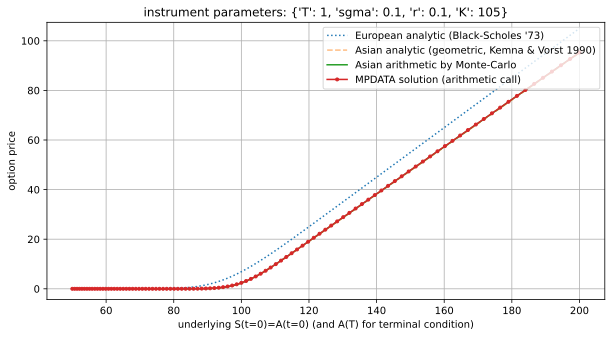

/home/pawel/PycharmProjects/PyMPDATA/examples/PyMPDATA_examples/Magnuszewski_et_al_2025/asian_option.py:348: RuntimeWarning: divide by zero encountered in divide
  abs(arithmetic_by_mc - history[frame_index][:, 0]) / arithmetic_by_mc,
/home/pawel/PycharmProjects/PyMPDATA/examples/PyMPDATA_examples/Magnuszewski_et_al_2025/asian_option.py:357: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(0, 100)


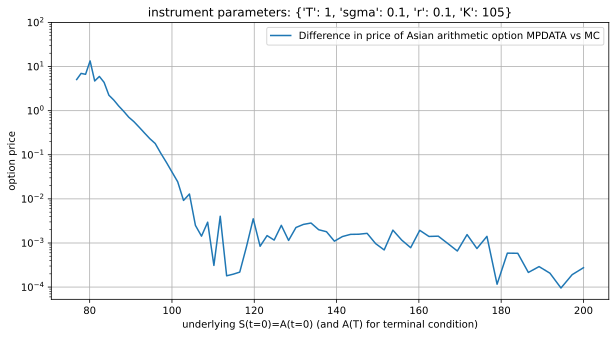

True price: 2.313
Numeric price: 2.406092155029739
MC price: 2.3119892133990234


In [56]:
params = {
        'T': 1,
        'K': 105,
        'r': 0.1,
        'sgma': 0.1,
        'spot': 100,
        'true_price': 2.313,
    }
run_numeric_and_mc(params, nx=101, ny=200, nt=500)

self.l2=np.float64(7.322862580676743)
dx: 0.017114745199010992, dy: 0.8733624454148472, dt: 0.001, l2: 7.322862580676743
CFL 0.23367433193248013
courant_x=np.float64(0.004674331932480243), courant_y=np.float64(0.2289999999999999)
x_dim_advector.shape=(82, 230), self.a_dim_advector.shape=(81, 231)


IntProgress(value=0, max=1000)

81it [02:35,  1.92s/it]


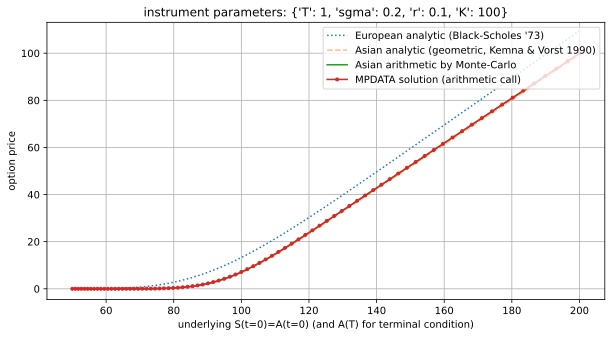

/home/pawel/PycharmProjects/PyMPDATA/examples/PyMPDATA_examples/Magnuszewski_et_al_2025/asian_option.py:348: RuntimeWarning: divide by zero encountered in divide
  abs(arithmetic_by_mc - history[frame_index][:, 0]) / arithmetic_by_mc,
/home/pawel/PycharmProjects/PyMPDATA/examples/PyMPDATA_examples/Magnuszewski_et_al_2025/asian_option.py:357: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(0, 100)


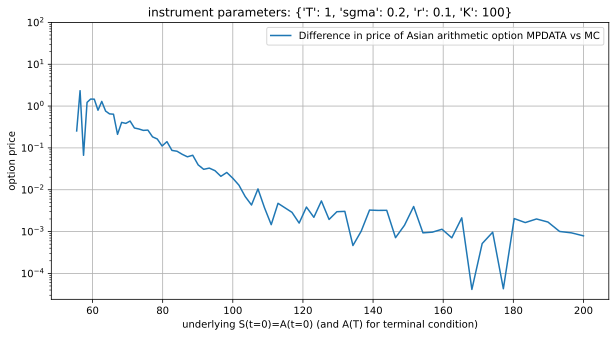

True price: 7.079
Numeric price: 7.144350540256231
MC price: 7.012412962830045


In [23]:
params = {
        'T': 1,
        'K': 100,
        'r': 0.1,
        'sgma': 0.2,
        'spot': 100,
        'true_price': 7.079,
    }
run_numeric_and_mc(params, nx=81, ny=230, nt=1000)

self.l2=np.float64(4.70986191469661)
dx: 0.013725686743761291, dy: 1.834862385321101, dt: 0.001, l2: 4.70986191469661
CFL 0.11482848796519138
courant_x=np.float64(0.005828487965191413), courant_y=np.float64(0.10899999999999996)
x_dim_advector.shape=(102, 110), self.a_dim_advector.shape=(101, 111)


IntProgress(value=0, max=1000)

101it [03:16,  1.94s/it]


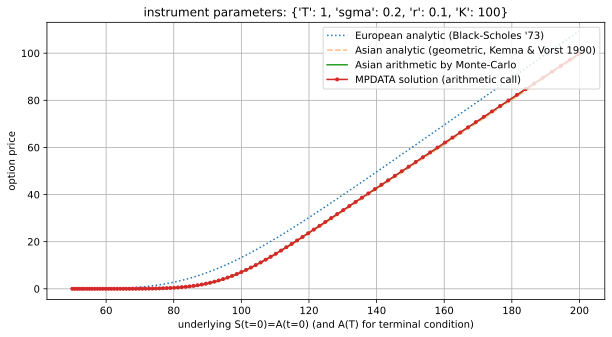

/home/pawel/PycharmProjects/PyMPDATA/examples/PyMPDATA_examples/Magnuszewski_et_al_2025/asian_option.py:348: RuntimeWarning: divide by zero encountered in divide
  abs(arithmetic_by_mc - history[frame_index][:, 0]) / arithmetic_by_mc,
/home/pawel/PycharmProjects/PyMPDATA/examples/PyMPDATA_examples/Magnuszewski_et_al_2025/asian_option.py:357: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(0, 100)


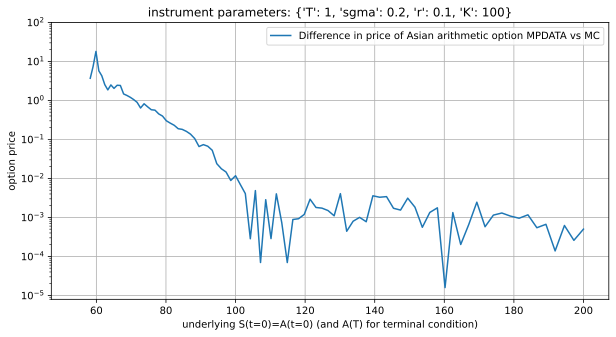

True price: 7.079
Numeric price: 7.107824512456937
MC price: 7.025314198013039


In [41]:
params = {
        'T': 1,
        'K': 100,
        'r': 0.1,
        'sgma': 0.2,
        'spot': 100,
        'true_price': 7.079,
    }
run_numeric_and_mc(params, nx=101, ny=110, nt=1000)

self.l2=np.float64(4.922338097652495)
dx: 0.011456978191073474, dy: 1.4388489208633093, dt: 0.0006666666666666666, l2: 4.922338097652495
CFL 0.09732176266526836
courant_x=np.float64(0.004655095998601723), courant_y=np.float64(0.09266666666666663)
x_dim_advector.shape=(122, 140), self.a_dim_advector.shape=(121, 141)


IntProgress(value=0, max=1500)

121it [03:53,  1.93s/it]


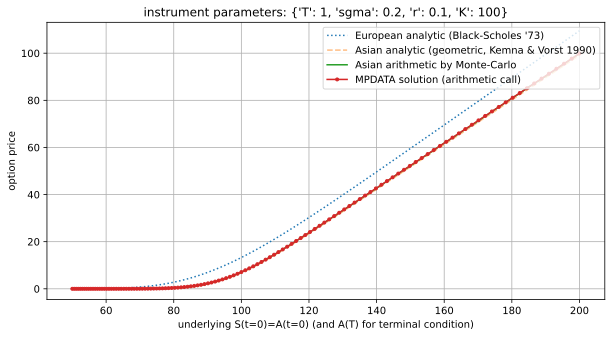

/home/pawel/PycharmProjects/PyMPDATA/examples/PyMPDATA_examples/Magnuszewski_et_al_2025/asian_option.py:348: RuntimeWarning: divide by zero encountered in divide
  abs(arithmetic_by_mc - history[frame_index][:, 0]) / arithmetic_by_mc,
/home/pawel/PycharmProjects/PyMPDATA/examples/PyMPDATA_examples/Magnuszewski_et_al_2025/asian_option.py:357: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(0, 100)


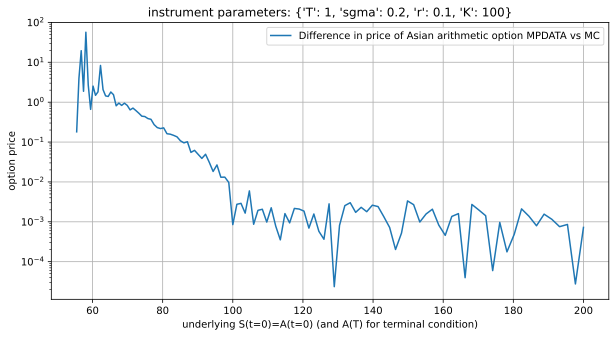

True price: 7.079
Numeric price: 7.095413559280128
MC price: 7.101455066689407


In [44]:
params = {
        'T': 1,
        'K': 100,
        'r': 0.1,
        'sgma': 0.2,
        'spot': 100,
        'true_price': 7.079,
    }
run_numeric_and_mc(params, nx=121, ny=140, nt=1500)

self.l2=np.float64(4.765453421128755)
dx: 0.01952527269182944, dy: 2.816901408450704, dt: 0.0005, l2: 4.765453421128755
CFL 0.03601215673951556
courant_x=np.float64(0.000512156739515582), courant_y=np.float64(0.03549999999999998)
x_dim_advector.shape=(72, 72), self.a_dim_advector.shape=(71, 73)


IntProgress(value=0, max=2000)

71it [02:16,  1.93s/it]


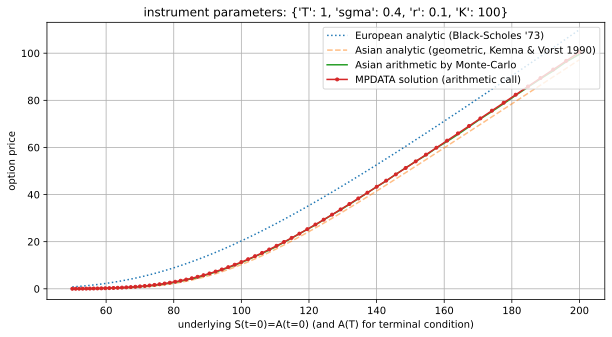

/home/pawel/PycharmProjects/PyMPDATA/examples/PyMPDATA_examples/Magnuszewski_et_al_2025/asian_option.py:357: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(0, 100)


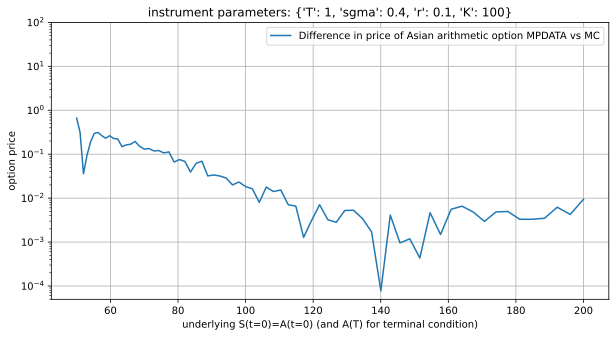

True price: 11.213
Numeric price: 11.343285048727003
MC price: 11.139700755776591


In [37]:
params = {
        'T': 1,
        'K': 100,
        'r': 0.1,
        'sgma': 0.4,
        'spot': 100,
        'true_price': 11.213,
    }
run_numeric_and_mc(params, nx=71, ny=72, nt=2000)

self.l2=np.float64(3.6261699516830777)
dx: 0.015234003968350443, dy: 2.0202020202020203, dt: 0.0004, l2: 3.6261699516830777
CFL 0.04012514099488357
courant_x=np.float64(0.0005251409948835825), courant_y=np.float64(0.03959999999999998)
x_dim_advector.shape=(92, 100), self.a_dim_advector.shape=(91, 101)


IntProgress(value=0, max=2500)

91it [02:55,  1.93s/it]


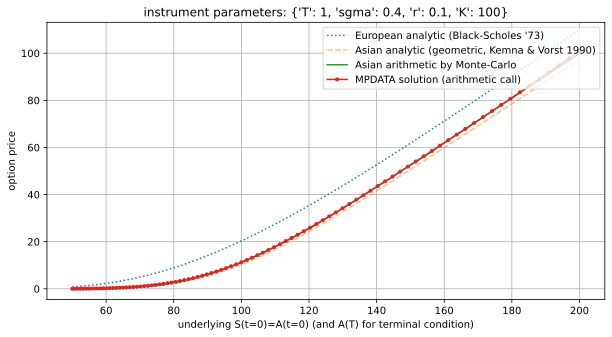

/home/pawel/PycharmProjects/PyMPDATA/examples/PyMPDATA_examples/Magnuszewski_et_al_2025/asian_option.py:357: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(0, 100)


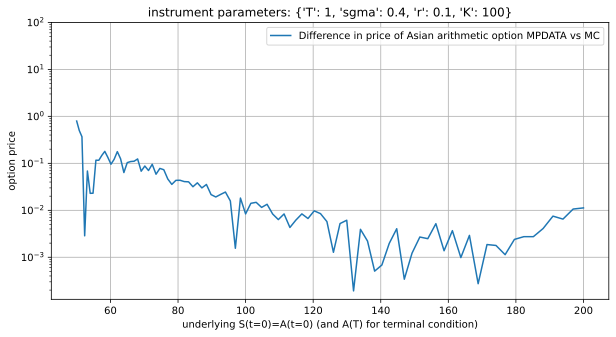

True price: 11.213
Numeric price: 11.28903997447289
MC price: 11.195232722513001


In [40]:
params = {
        'T': 1,
        'K': 100,
        'r': 0.1,
        'sgma': 0.4,
        'spot': 100,
        'true_price': 11.213,
    }
run_numeric_and_mc(params, nx=91, ny=100, nt=2500)

self.l2=np.float64(4.70986191469661)
dx: 0.013725686743761291, dy: 1.834862385321101, dt: 0.00025, l2: 4.70986191469661
CFL 0.027614280497824453
courant_x=np.float64(0.00036428049782446316), courant_y=np.float64(0.02724999999999999)
x_dim_advector.shape=(102, 110), self.a_dim_advector.shape=(101, 111)


IntProgress(value=0, max=4000)

/home/pawel/PycharmProjects/PyMPDATA/PyMPDATA/boundary_conditions/extrapolated.py:63: RuntimeWarning: overflow encountered in scalar multiply
  ats(*focus_psi, 1) - (ats(*focus_psi, 2) - ats(*focus_psi, 1)) * cnst, 0
/home/pawel/PycharmProjects/PyMPDATA/examples/PyMPDATA_examples/Magnuszewski_et_al_2025/asian_option.py:79: RuntimeWarning: overflow encountered in scalar multiply
  ats(*focus_psi, -1) + (ats(*focus_psi, -1) - ats(*focus_psi, -2)) * cnst, 0
/home/pawel/PycharmProjects/PyMPDATA/examples/PyMPDATA_examples/Magnuszewski_et_al_2025/asian_option.py:79: RuntimeWarning: overflow encountered in scalar multiply
  ats(*focus_psi, -1) + (ats(*focus_psi, -1) - ats(*focus_psi, -2)) * cnst, 0
/home/pawel/PycharmProjects/PyMPDATA/PyMPDATA/boundary_conditions/extrapolated.py:63: RuntimeWarning: overflow encountered in scalar multiply
  ats(*focus_psi, 1) - (ats(*focus_psi, 2) - ats(*focus_psi, 1)) * cnst, 0
/home/pawel/PycharmProjects/PyMPDATA/examples/PyMPDATA_examples/Magnuszewski_et_al

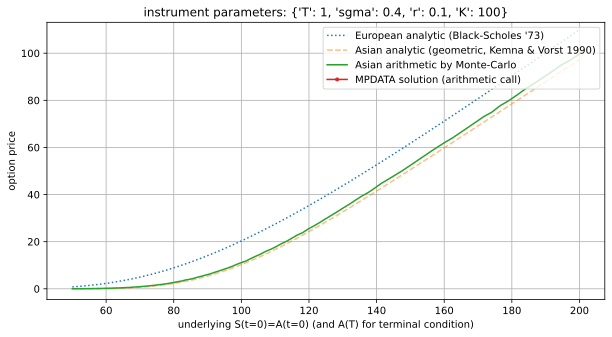

/home/pawel/PycharmProjects/PyMPDATA/examples/PyMPDATA_examples/Magnuszewski_et_al_2025/asian_option.py:357: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(0, 100)


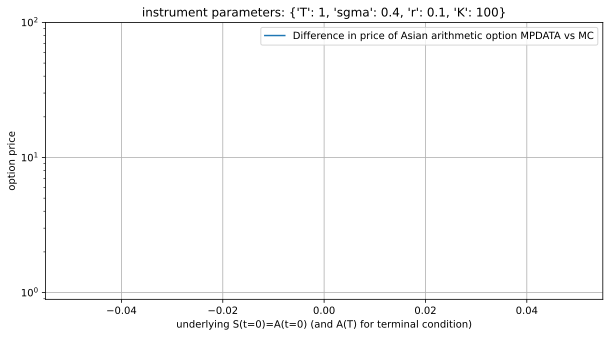

True price: 11.213
Numeric price: nan
MC price: 11.110366699532493


In [49]:
params = {
        'T': 1,
        'K': 100,
        'r': 0.1,
        'sgma': 0.4,
        'spot': 100,
        'true_price': 11.213,
    }
run_numeric_and_mc(params, nx=101, ny=110, nt=4000)